In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_samples(model, df, img_dir, IMG_SIZE=(300,300), n=5):
    """
    Muestra n muestras aleatorias con su bounding-box real (azul)
    y la predicha por el modelo (rojo).
    """
    samples = df.sample(n).reset_index(drop=True)
    for _, row in samples.iterrows():
        # Carga y redimensionamiento
        path = os.path.join(img_dir, row['Image'])
        img    = Image.open(path).convert('RGB')
        orig_w, orig_h = img.size
        img_resized    = img.resize(IMG_SIZE)
        arr = np.array(img_resized) / 255.0

        # Predicción
        pred = model.predict(arr[np.newaxis])[0]  # [x1,y1,x2,y2] normalizados

        # Ground-truth normalizado
        gt = np.array([
            row['x_top']    / orig_w,
            row['y_top']    / orig_h,
            row['x_bottom'] / orig_w,
            row['y_bottom'] / orig_h
        ], dtype=np.float32)

        # Escalar a píxeles
        scale = np.array([IMG_SIZE[0], IMG_SIZE[1], IMG_SIZE[0], IMG_SIZE[1]])
        x1_g, y1_g, x2_g, y2_g = gt * scale
        x1_p, y1_p, x2_p, y2_p = pred * scale

        # Dibujo
        plt.figure(figsize=(5,5))
        plt.imshow(img_resized)
        # Caja GT (azul)
        plt.gca().add_patch(plt.Rectangle(
            (x1_g, y1_g), x2_g-x1_g, y2_g-y1_g,
            edgecolor='blue', fill=False, linewidth=2
        ))
        # Caja predicha (rojo)
        plt.gca().add_patch(plt.Rectangle(
            (x1_p, y1_p), x2_p-x1_p, y2_p-y1_p,
            edgecolor='red', fill=False, linewidth=2
        ))
        # Título con IoU
        inter_w = max(0, min(x2_g, x2_p) - max(x1_g, x1_p))
        inter_h = max(0, min(y2_g, y2_p) - max(y1_g, y1_p))
        inter   = inter_w * inter_h
        union   = (x2_g-x1_g)*(y2_g-y1_g) + (x2_p-x1_p)*(y2_p-y1_p) - inter + 1e-6
        iou_val = inter / union

        plt.title(f'IoU: {iou_val:.3f}')
        plt.axis('off')
        plt.show()


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 300, 300, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 300, 300, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 300, 300, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 300, 300, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 301, 301, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 150, 150, 40)   │          1,080 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 150, 150, 40)   │            160 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 150, 150, 40)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 150, 150, 40)   │            360 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 150, 150, 40)   │            160 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 150, 150, 40)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 40)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 40)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 10)       │            410 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 11,702,835 (44.64 MB)

 Trainable params: 11,615,532 (44.31 MB)

 Non-trainable params: 87,303 (341.03 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 315s 5s/step - loss: 1.0823 - val_loss: 1.0804 - learning_rate: 1.0000e-05
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 325ms/step - loss: 1.0670 - val_loss: 1.0747 - learning_rate: 1.0000e-05
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 322ms/step - loss: 1.0550 - val_loss: 1.0665 - learning_rate: 1.0000e-05
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 338ms/step - loss: 1.0478 - val_loss: 1.0567 - learning_rate: 1.0000e-05
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 312ms/step - loss: 1.0424 - val_loss: 1.0485 - learning_rate: 1.0000e-05
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 321ms/step - loss: 1.0401 - val_loss: 1.0469 - learning_rate: 1.0000e-05
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 319ms/step - loss: 1.0371 - val_loss: 1.0437 - learning_rate: 1.0000e-05
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 325ms/step - loss: 1.0358 - val_loss: 1.0379 - learning_rate: 1.0000e-05
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 321ms/step - loss: 1.0335 - val_loss: 1.

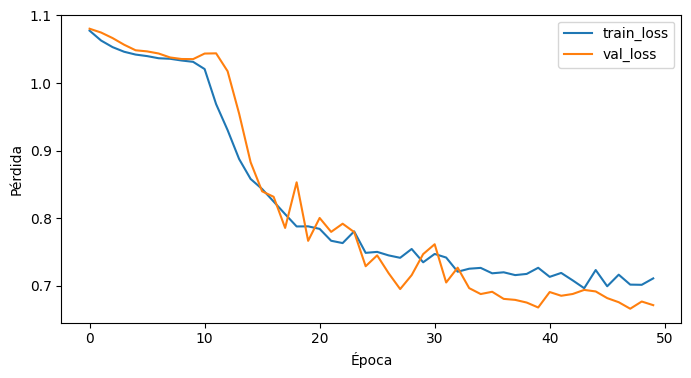

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
IoU medio validación: 0.341


In [1]:

import os
import glob
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split

# -------------------------
# Configuración
# -------------------------
IMG_SIZE        = (300, 300)
BATCH_SIZE      = 16
TOTAL_EPOCHS    = 50
LR              = 1e-5
LAMBDA_IOU      = 1.0
CHECKPOINT_DIR  = 'checkpoints'
BEST_MODEL_PATH = 'best_bbox_model.keras'
HISTORY_PATH    = 'history.pkl'

os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# -------------------------
# Rutas de datos
# -------------------------
csv_path = "/content/drive/MyDrive/Procesamiento Imagenes/Taller_5_Realizar un modelo de deteccion de boundboxes/Airplanes.csv"
img_dir  = "/content/drive/MyDrive/Procesamiento Imagenes/Taller_5_Realizar un modelo de deteccion de boundboxes/airplanes"

# -------------------------
# IoU normalizada
# -------------------------
def iou_normalized(box1, box2):
    x1 = tf.maximum(box1[...,0], box2[...,0])
    y1 = tf.maximum(box1[...,1], box2[...,1])
    x2 = tf.minimum(box1[...,2], box2[...,2])
    y2 = tf.minimum(box1[...,3], box2[...,3])
    inter = tf.maximum(x2-x1,0) * tf.maximum(y2-y1,0)
    area1 = (box1[...,2]-box1[...,0])*(box1[...,3]-box1[...,1])
    area2 = (box2[...,2]-box2[...,0])*(box2[...,3]-box2[...,1])
    union = area1 + area2 - inter + 1e-6
    return inter/union

# -------------------------
# Loss compuesta
# -------------------------
huber = Huber()
def combined_loss(y_true, y_pred):
    l_h = huber(y_true, y_pred)
    iou = iou_normalized(y_true, y_pred)
    l_i = 1 - tf.reduce_mean(iou)
    return l_h + LAMBDA_IOU * l_i

# -------------------------
# Generador con augmentaciones
# -------------------------
class DataGenerator(Sequence):
    def __init__(self, df, img_dir, batch_size, augment=False):
        self.df         = df.reset_index(drop=True)
        self.img_dir    = img_dir
        self.batch_size = batch_size
        self.augment    = augment

    def __len__(self):
        return int(np.ceil(len(self.df)/self.batch_size))

    def __getitem__(self, idx):
        batch = self.df.iloc[idx*self.batch_size:(idx+1)*self.batch_size]
        imgs, boxes = [], []
        for _, row in batch.iterrows():
            path = os.path.join(self.img_dir, row['Image'])
            img = Image.open(path).convert('RGB').resize(IMG_SIZE)
            arr = np.array(img)/255.0
            orig_w, orig_h = img.size

            box = np.array([
                row['x_top']/orig_w,
                row['y_top']/orig_h,
                row['x_bottom']/orig_w,
                row['y_bottom']/orig_h
            ], dtype=np.float32)

            if self.augment:
                # flip
                if np.random.rand()<0.5:
                    arr = np.fliplr(arr)
                    box = np.array([1-box[2], box[1], 1-box[0], box[3]],dtype=np.float32)
                # rotación ±15°
                #ang = np.random.uniform(-15,15)
                #arr = np.array(Image.fromarray((arr*255).astype(np.uint8)).rotate(ang))/255.0
                # brillo
                arr = np.array(
                    ImageEnhance.Brightness(
                        Image.fromarray((arr*255).astype(np.uint8))
                    ).enhance(np.random.uniform(0.8,1.2))
                )/255.0

            imgs.append(arr)
            boxes.append(box)

        return np.array(imgs, dtype=np.float32), np.stack(boxes)

# -------------------------
# Modelo
# -------------------------
def build_model():
    base = tf.keras.applications.EfficientNetB3(
        input_shape=IMG_SIZE+(3,),
        include_top=False,
        weights='imagenet',
        pooling='avg'
    )
    x = layers.Dense(512,activation='relu')(base.output)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(256,activation='relu')(x)
    out = layers.Dense(4, activation='sigmoid')(x)
    m = models.Model(base.input, out)
    m.compile(optimizer=Adam(LR), loss=combined_loss)
    return m

# -------------------------
# Gráficos y evaluación
# -------------------------
def plot_loss(hist_dict):
    if 'loss' in hist_dict and 'val_loss' in hist_dict:
        plt.figure(figsize=(8,4))
        plt.plot(hist_dict['loss'],  label='train_loss')
        plt.plot(hist_dict['val_loss'], label='val_loss')
        plt.xlabel('Época'); plt.ylabel('Pérdida')
        plt.legend(); plt.show()
    else:
        print("⚠️ No hay datos de 'loss' para graficar.")

def eval_iou(model, gen):
    ious = []
    for i in range(len(gen)):
        imgs, gt = gen[i]
        pred = model.predict(imgs)
        b_iou = iou_normalized(gt, pred).numpy().flatten()
        if b_iou.size>0:
            ious.extend(b_iou.tolist())
    if ious:
        print(f"IoU medio validación: {np.mean(ious):.3f}")
    else:
        print("⚠️ No se calcularon IoUs: revisa tu val_gen.")

# -------------------------
# SCRIPT PRINCIPAL
# -------------------------
if __name__ == '__main__':
    # 1) Carga y split
    df = pd.read_csv(csv_path)
    train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

    # 2) Generadores
    train_gen = DataGenerator(train_df, img_dir, BATCH_SIZE, augment=True)
    val_gen   = DataGenerator(val_df,   img_dir, BATCH_SIZE, augment=False)

    # 3) Modelo y callbacks
    model = build_model()
    model.summary()

    cb_list = [
        callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5),
        callbacks.ModelCheckpoint(BEST_MODEL_PATH, monitor='val_loss', save_best_only=True),
        callbacks.ModelCheckpoint(
            filepath=os.path.join(CHECKPOINT_DIR, 'epoch_{epoch:02d}.weights.h5'),
            save_weights_only=True,
            save_freq='epoch'
        )
    ]

    # 4) Reanudar si hay checkpoint
    ckpts = sorted(glob.glob(os.path.join(CHECKPOINT_DIR,'epoch_*.weights.h5')))
    if ckpts:
        last = ckpts[-1]
        print("Cargando pesos de:", last)
        model.load_weights(last)
        initial_epoch = int(os.path.basename(last).split('_')[1].split('.')[0])
    else:
        initial_epoch = 0

    # 5) Entrenamiento
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=TOTAL_EPOCHS,
        initial_epoch=initial_epoch,
        callbacks=cb_list
    )

    # 6) Guardado condicional de history
    if history.history.get('loss'):
        with open(HISTORY_PATH, 'wb') as f:
            pickle.dump(history.history, f)

    # 7) Evaluación/plots
    try:
        # Carga historial si existe
        if os.path.exists(HISTORY_PATH):
            with open(HISTORY_PATH,'rb') as f:
                hist = pickle.load(f)
        else:
            hist = {}
        plot_loss(hist)
        eval_iou(model, val_gen)
    except Exception as e:
        print("Error durante evaluación/visualización:", e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


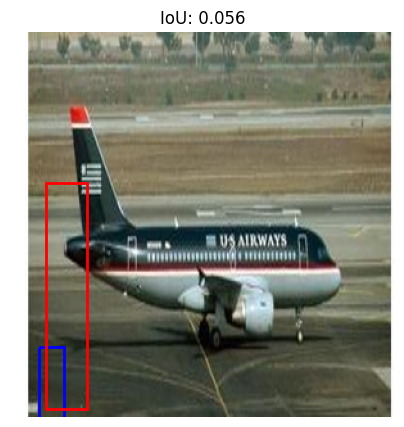

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


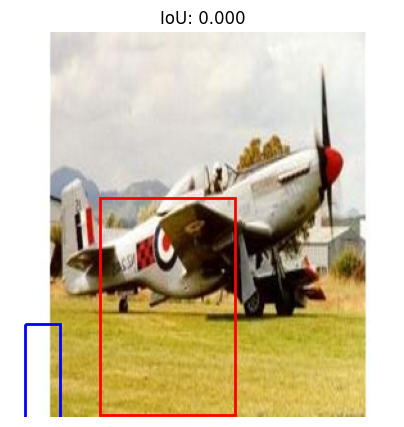

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


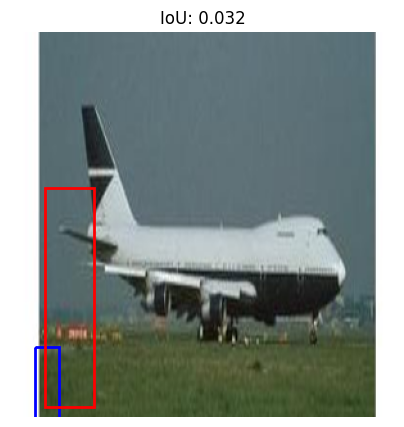

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


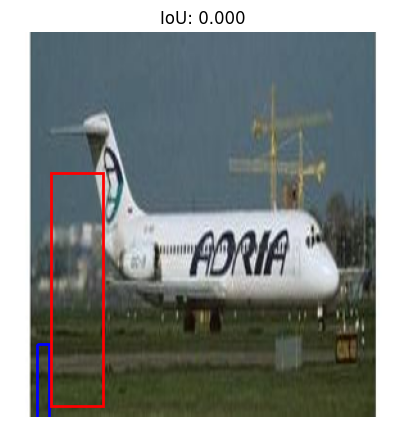

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


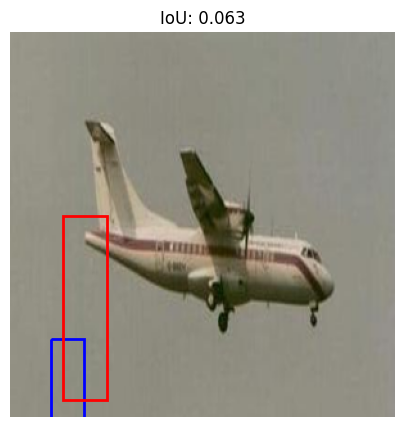

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


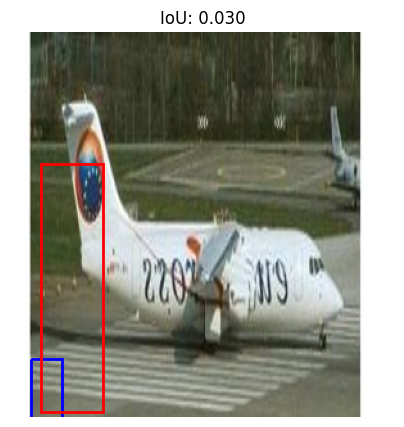

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


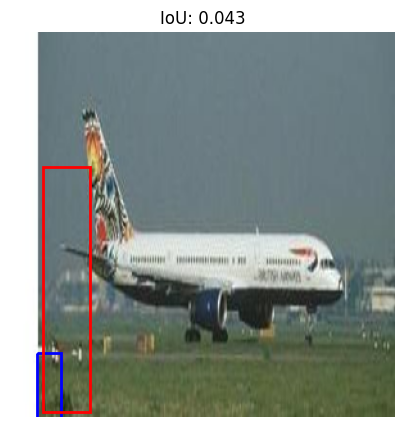

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


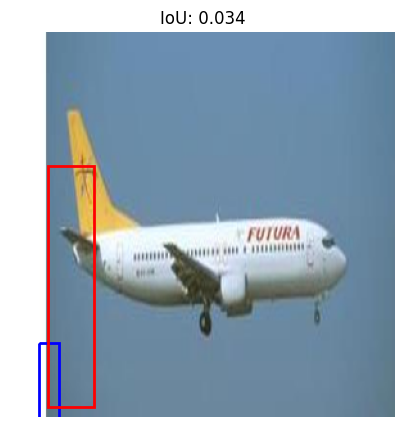

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


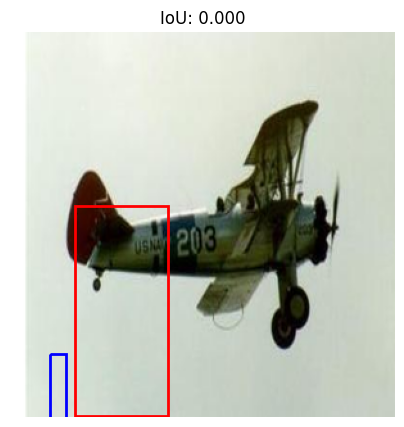

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


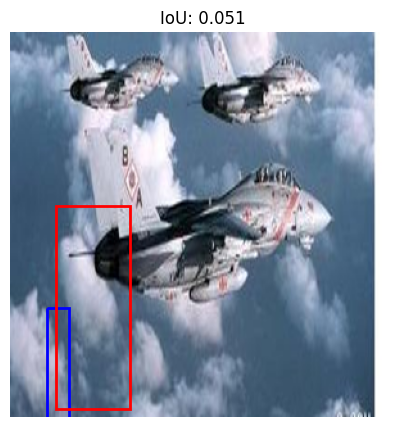

In [10]:
plot_samples(model, val_df, img_dir, n=10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


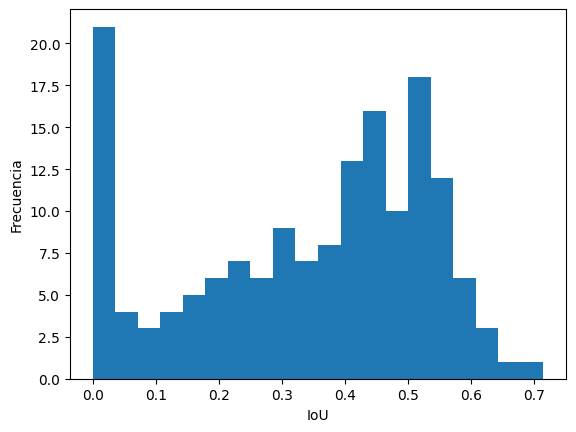

In [7]:
all_ious = []
for i in range(len(val_gen)):
    imgs, gt = val_gen[i]
    pred = model.predict(imgs)
    all_ious.extend(iou_normalized(gt, pred).numpy().flatten().tolist())
plt.hist(all_ious, bins=20)
plt.xlabel('IoU'); plt.ylabel('Frecuencia'); plt.show()


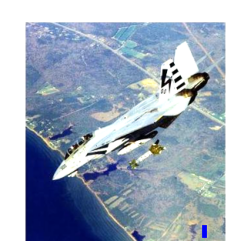

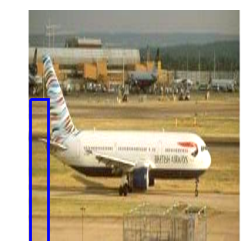

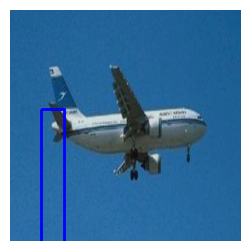

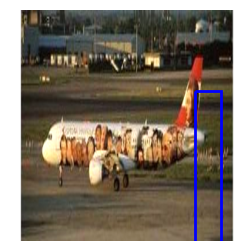

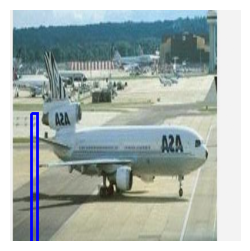

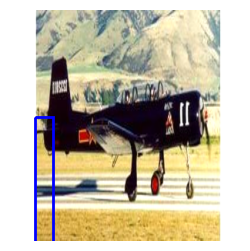

In [8]:
import matplotlib.pyplot as plt

# Toma el primer batch de train_gen
imgs, boxes = train_gen[0]
for i in range(min(6, len(imgs))):
    img = imgs[i]
    x1, y1, x2, y2 = boxes[i]
    # Escala a pixels
    x1, y1, x2, y2 = x1*IMG_SIZE[0], y1*IMG_SIZE[1], x2*IMG_SIZE[0], y2*IMG_SIZE[1]

    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.gca().add_patch(plt.Rectangle(
        (x1,y1), x2-x1, y2-y1,
        edgecolor='blue', fill=False, linewidth=2
    ))
    plt.axis('off')
    plt.show()
